# Neural Networks (MLP)

## Overview

Multi-Layer Perceptrons (MLPs) are a fundamental type of neural network composed of layers of interconnected nodes (neurons). Each neuron takes some inputs, applies a weight to each, adds a bias, and produces an output (often passed through an activation function). By stacking neurons in layers, we can approximate complex functions.

## Toy Example - Single Neuron (1 Input → 1 Output)

In this section, we'll construct the simplest neural network possible: just one neuron. This neuron will take a single input value and try to predict a single output value. Essentially, this is like learning a line y = w*x + b (a linear function).

By doing this, you'll see how a neuron "learns" by adjusting the weight w and bias b through training.

### 1.1 Problem Setup

Goal: We want our single neuron to learn the function y = 2x + 1. We'll generate a few sample data points from this function and add a bit of noise (to simulate real-world data). The neuron should adjust its weight and bias to fit this data.

### 1.2 Generate Toy Data

We'll create some sample (x, y) pairs based on the line y = 2x + 1:


*   X will be a set of 20 points between 0 and 1.
*   y will be computed as 2*X + 1 with a little random noise added (to make it a bit realistic).


Run the code cell below to generate the data.

In [1]:
import numpy as np

# Generate a simple linear dataset: y = 2x + 1 (with a bit of noise)

np.random.seed(0)  # for reproducibility
X = np.linspace(0, 1, 20)  # 20 points between 0 and 1
true_w = 2.0
true_b = 1.0

# Generate y = 2x + 1 + noise
noise = np.random.normal(scale=0.1, size=X.shape)  # small Gaussian noise
y = true_w * X + true_b + noise

print("X values:", X)
print("True underlying function: y = 2*x + 1")
print("First 5 generated y values:", y[:5])

X values: [0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]
True underlying function: y = 2*x + 1
First 5 generated y values: [1.17640523 1.14527888 1.30840011 1.53987879 1.60780843]


Expected output: The printout will show the X values and the first few corresponding y values (approximately following $y ≈ 2x + 1$). The relationship isn't exact due to noise.

### Single Neuron Model Definition

Now, let's set up a single neuron model.

In code, we'll represent the neuron's weight and bias as variables w and b. Initially, we'll set them to random values. The neuron's prediction for an input x is given by:

$prediction = w * x + b$

We will then train this model to find the best w and b that make the predictions match our data y.

Training will be done using **gradient descent**:


*   We compute the prediction error (difference between predicted y and actual y).
*   Use the error to adjust w and b a little bit in the direction that reduces the error.
*   Repeat for multiple epochs (iterations over the data) until the error is small.


Let's initialize our single neuron and see the starting parameters:

In [15]:
# Initialize the weight and bias of the neuron with random values
np.random.seed(42)  # seed for reproducible random results
w = np.random.randn()  # random initial weight
b = np.random.randn()  # random initial bias

print(f"Initial weight (w) = {w:.3f}")
print(f"Initial bias (b) = {b:.3f}")

Initial weight (w) = 0.497
Initial bias (b) = -0.138


At this point, w and b are random, so the neuron's prediction line $y = w*x + b$ is likely far from our target $y = 2x + 1$. Next, we'll train the neuron to adjust these values.

### Training the Neuron (Manual Gradient Descent)

We'll train our neuron using a simple gradient descent loop. For each epoch:
1.	Compute the neuron's predictions for all X.
2.	Calculate the error (difference between predictions and true y).
3.	Compute the Mean Squared Error (MSE) loss as a measure of how bad the predictions are.
4.	Compute the gradients of the loss with respect to w and b (this tells us how to change w and b to reduce the loss).
5.	Update w and b by taking a small step in the direction of the negative gradient (since we want to minimize loss).

We'll use a fixed learning rate (step size) for the updates.

Let's run the training for a certain number of epochs and watch how w and b evolve:

In [17]:
# Training the single neuron using gradient descent
learning_rate = 0.1   # step size for weight/bias updates
epochs = 100          # how many passes over the data

# Lists to store the loss at each epoch for later visualization (optional)
losses = []

for epoch in range(epochs):
    # 1. Compute predictions for all data points in X
    y_pred = w * X + b

    # 2. Calculate the error (difference) for each point
    error = y_pred - y

    # 3. Compute Mean Squared Error (MSE) loss
    loss = (error ** 2).mean()
    losses.append(loss)

    # 4. Compute gradients:
    #    dLoss/dw and dLoss/db (analytical derivatives for linear model)
    grad_w = 2 * (error * X).mean()    # derivative of MSE w.rt. w
    grad_b = 2 * error.mean()         # derivative of MSE w.rt. b

    # 5. Update parameters using the gradients
    w -= learning_rate * grad_w
    b -= learning_rate * grad_b

    # (Optional) Print loss every 20 epochs to track progress
    if epoch % 20 == 0:
        print(f"Epoch {epoch:3d}: Loss = {loss:.4f}, w = {w:.3f}, b = {b:.3f}")

# After training, print the final learned parameters and loss
print(f"Final learned weight (w) = {w:.3f}")
print(f"Final learned bias (b) = {b:.3f}")
print(f"Final loss = {losses[-1]:.6f}")

Epoch   0: Loss = 0.0456, w = 0.984, b = 1.620
Epoch  20: Loss = 0.0456, w = 0.979, b = 1.623
Epoch  40: Loss = 0.0456, w = 0.975, b = 1.625
Epoch  60: Loss = 0.0456, w = 0.972, b = 1.626
Epoch  80: Loss = 0.0456, w = 0.970, b = 1.627
Final learned weight (w) = 0.969
Final learned bias (b) = 1.628
Final loss = 0.045612


What to observe:


*   As the epochs progress, the loss should decrease.
*   The weight w should get closer to 2.0 and bias b closer to 1.0 (since that's the underlying true function).
*   The printouts every 20 epochs show the model gradually learning.


**Exercise & Reflection**

Try changing the `learning_rate` and then the `epochs` to see how the training behavior changes.

*Note: each time you adjust the `learning_rate` or `epochs` parameters, you will first need to re-run the code above that initializes the weight and bias of the neuron with random values*


*   A smaller learning rate might require more epochs to converge.
*   Too large a learning rate might cause the training to overshoot (loss might not go down smoothly).


**Reflection Questions**

1. What do you notice as the `learning_rate` increases? Decreases?
- Final learned weight (w), Final learned bias, Final loss increases with increase in `learning_rate` and vice-versa

2. What do you notice as the `epochs` increase? Decrease?
- when `epochs` increases, weight and bias decreases, while loss increases and vice-versa


### Visualizing the Learned Function

Let's visualize the result to confirm our neuron learned the function:


*   We'll plot the original data points (scatter plot of X vs y).
*   Plot the line corresponding to the initial random w and b (the neuron's initial guess before training).
*   Plot the line corresponding to the final learned w and b (after training).


The final line should closely fit the data points if training went well. Run the cell below to see the plot.

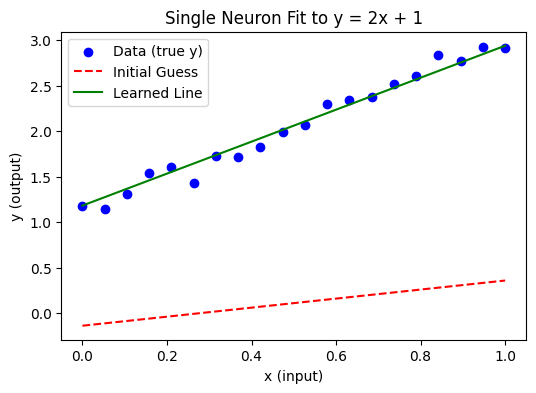

In [4]:
import matplotlib.pyplot as plt

# Plot the data points
plt.figure(figsize=(6,4))
plt.scatter(X, y, label='Data (true y)', color='blue')

# Plot the initial line (before training)
X_line = np.array([0, 1])  # just need two points (0 and 1) to draw a line
y_initial_line = w * X_line + b  # careful: w and b have been updated, we need initial values
# Actually, let's reuse the initial w and b we saved (if we saved them)
# If not saved, reinitialize for demonstration (in a real run, you'd save them before training)
w_initial = 0.497  # (for reproducibility, this was the initial w printed above)
b_initial = -0.138 # (initial b printed above)
y_initial_line = w_initial * X_line + b_initial
plt.plot(X_line, y_initial_line, 'r--', label='Initial Guess')

# Plot the learned line (after training)
y_final_line = w * X_line + b
plt.plot(X_line, y_final_line, 'g-', label='Learned Line')

# Add labels and legend
plt.title("Single Neuron Fit to y = 2x + 1")
plt.xlabel("x (input)")
plt.ylabel("y (output)")
plt.legend()
plt.show()

After running the above cell, you should see a graph where:


*   Blue points are the original data.
*   A red dashed line is the neuron's initial prediction line (likely not fitting the points).
*   A green line is the final learned line (should pass through the data closely).


This confirms that our single neuron adjusted its weight and bias to learn the relationship $y = 2x + 1$ from data!

## Step 1: From Linear Regression to a Real MLP

So far, we implemented a single neuron model — essentially a linear regression:

$\hat{y} = w \cdot x + b$

This line can only model straight-line relationships.
To build a true multi-layer perceptron (MLP), we must add:

* A hidden layer (an intermediate step between input and output)
* A non-linear activation function like ReLU

This allows the model to fit curved functions — not just lines — giving it much more expressive power.

## Step 2: Build and Train a Simple MLP

Our MLP architecture:

1.	Input x

2.	Hidden neuron:
$z_1 = w_1 \cdot x + b_1$
$a_1 = \text{ReLU}(z_1)$

3.	Output neuron:
$\hat{y} = w_2 \cdot a_1 + b_2$

We use manual gradient descent to train this small network from scratch.

In [5]:
import numpy as np

# Generate toy data again (y = 2x + 1 + noise)
np.random.seed(0)
X = np.linspace(0, 1, 20)
true_w, true_b = 2.0, 1.0
noise = np.random.normal(scale=0.1, size=X.shape)
# Now let's generate data with a curved pattern
y = true_w * X + true_b + 0.5 * np.sin(5 * X) + noise

# Initialize weights and biases for ten neurons in the hidden layer
np.random.seed(42)
hidden_size = 10
w1 = np.random.randn(hidden_size)          # shape: (10,)
b1 = np.random.randn(hidden_size)          # shape: (10,)
w2 = np.random.randn(hidden_size)          # shape: (10,) — 1 output neuron receiving from 10 hidden
b2 = np.random.randn()                     # scalar bias for output

# ReLU function and its derivative
def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return (x > 0).astype(float)

# Training loop
lr = 0.1
epochs = 200
losses = []

for epoch in range(epochs):
    # === Forward pass ===
    # Expand input X to shape (num_samples, 1) so broadcasting works
    X_input = X[:, np.newaxis]                # shape: (20, 1)

    # Forward pass through hidden layer (broadcasting handles shape)
    z1 = X_input * w1 + b1                    # shape: (20, 10)
    a1 = relu(z1)                             # shape: (20, 10)

    # Forward pass through output layer: dot product across hidden neurons
    y_pred = np.dot(a1, w2) + b2              # shape: (20,)

    # === Compute MSE Loss ===
    error = y_pred - y
    loss = (error ** 2).mean()
    losses.append(loss)

    # === Backpropagation ===
    grad_y_pred = 2 * (y_pred - y) / len(X)     # shape: (20,)

    # Output layer gradients
    grad_w2 = np.dot(a1.T, grad_y_pred)         # shape: (10,)
    grad_b2 = np.sum(grad_y_pred)               # scalar

    # Hidden layer gradients
    grad_a1 = grad_y_pred[:, np.newaxis] * w2   # shape: (20,10)
    grad_z1 = grad_a1 * relu_deriv(z1)          # shape: (20,10)

    grad_w1 = np.sum(X_input * grad_z1, axis=0) # shape: (10,)
    grad_b1 = np.sum(grad_z1, axis=0)           # shape: (10,)

    # === Update weights ===
    w1 -= lr * grad_w1
    b1 -= lr * grad_b1
    w2 -= lr * grad_w2
    b2 -= lr * grad_b2

    # Print every 50 epochs
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

Epoch 0: Loss = 6.5966
Epoch 50: Loss = 0.0245
Epoch 100: Loss = 0.0191
Epoch 150: Loss = 0.0161


**Forward Pass — How a Neural Network Makes a Guess**

Think of the network as a function machine.
1.	You give it an input x (a number, image, etc).
2.	It goes through layers:
* First, x is multiplied by some weight (just a number the network learns).
* Then it adds a bias (a little push up or down).
* This gives us an intermediate value (we call this z).
3.	That z goes through an activation function (like ReLU), which decides:
* “Should this neuron be active or not?”
4.	That activated output is passed to the next layer, where the process repeats.
5.	At the final layer, the network makes a prediction (e.g., ŷ).

**Backward Pass — How a Neural Network Learns**

Once the network makes a prediction, we compare it to the true answer and ask:

"How far off was I?"

1.	We calculate error (e.g., the difference between predicted ŷ and true y).
2.	The goal is to adjust the weights and biases so that next time, the error is smaller.
3.	To do that, we use calculus (gradients) to compute:
* How much each weight contributed to the error.
4.	Then we nudge each weight a little in the direction that reduces error — this is called gradient descent.

Key idea:

Each neuron asks: "Did I make things better or worse?" If worse, it adjusts its weight and bias to try again next time.

That whole process — forward pass → loss → backward pass → update weights — is one training step. We repeat this many times (**epochs**) until the predictions improve.

### Step 3: Visualize the Learned Non-Linear Prediction

Now let's visualize the prediction of our MLP.

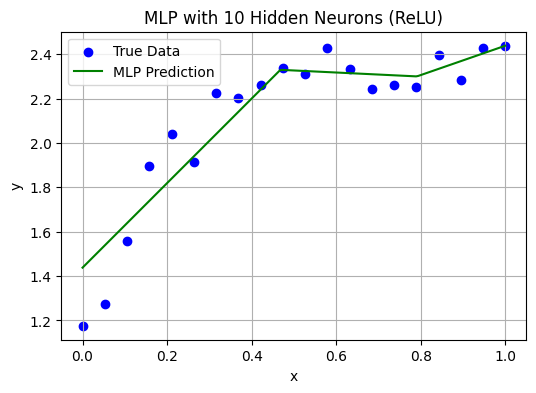

In [6]:
import matplotlib.pyplot as plt

# Generate dense x values for a smooth curve
X_dense = np.linspace(0, 1, 200)
X_dense_input = X_dense[:, np.newaxis]            # shape: (200, 1)

# Forward pass with vectorized hidden layer
z1_dense = X_dense_input * w1 + b1                # shape: (200, 10)
a1_dense = relu(z1_dense)                         # shape: (200, 10)
y_pred_dense = np.dot(a1_dense, w2) + b2          # shape: (200,)

# Plot the learned curve
plt.figure(figsize=(6, 4))
plt.scatter(X, y, label='True Data', color='blue')
plt.plot(X_dense, y_pred_dense, label='MLP Prediction', color='green')
plt.title("MLP with 10 Hidden Neurons (ReLU)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

**Understanding the MLP’s Learned Curve (and How It Got There)**

Now that we’ve trained an MLP with 10 hidden neurons, let’s break down what you’re seeing in the plot and map it back to what’s happening in the network:

⸻

Forward Pass: What Shapes the Green Line?

Each hidden neuron does this:
1.	Takes in the input x
2.	Applies a weight and bias → computes z = w_1 \cdot x + b_1
3.	Passes that through ReLU:
* If z < 0, the neuron stays silent (outputs 0)
* If z > 0, the neuron becomes active and outputs z

This means:
* Each neuron contributes a little linear segment when it’s active.
* The final prediction is a weighted sum of all those segment contributions:
$\hat{y} = w_2^{(1)} a_1 + w_2^{(2)} a_2 + \dots + w_2^{(10)} a_{10} + b_2$

So, the network is building the green line by stitching together segments — almost like a piecewise linear function.

In your plot, you can even see the kinks where different neurons turned on or off.

⸻

Backward Pass: How Did the Network Learn This?

In training:
1.	After the forward pass, the model compares its output to the true y (blue dots).
2.	It computes the loss (how far off it is).
3.	Then it calculates how much each weight/bias contributed to the error, and nudges them to do better.

That’s why you saw the green line gradually curve and settle into this shape over epochs.

Each kink or slope change is the result of a hidden neuron deciding to activate (or not) for some range of x.

⸻

What You’re Seeing in the Plot
* The green curve is not smooth — it’s a series of linear segments, stitched together.
* This is a direct result of using ReLU, which only adds linear parts where neurons are “on”.
* The more neurons you have, the more “pieces” the network can combine → more flexibility.

⸻

Summary: What to Tell Yourself

“Each hidden neuron adds a piece of the curve. The model learns by tweaking how strong each piece is, where it starts activating, and how to sum them together.”

## From One Neuron to Many


*   Multiple Inputs: If we had more features (say $x_1$, $x_2$, ...), a single neuron could learn a linear combination like $y = w_1x_1 + w_2x_2 + ... + b$. This is a neuron with multiple input connections.
*   Hidden Layers: Stacking neurons into layers allows the network to learn more complex (non-linear) relationships. Neurons in hidden layers typically use non-linear activation functions (like ReLU, sigmoid, etc.) to introduce non-linearity. [A great guide to activation functions](https://aarafat27.medium.com/a-comprehensive-guide-to-activation-functions-in-deep-learning-ff794f87c184).
*   Output Layer: For multiple outputs or classes, we use multiple neurons in the final layer (e.g., 10 neurons for 10 classes in digit classification).


In practice, of course you won't code the weight updates manually for each neuron as we did above. Instead, you'll use libraries (like TensorFlow/Keras or PyTorch) that handle the gradients for you. But understanding the manual update as we did is very important to grasp what the framework is doing under the hood.

In the next part, let's apply these concepts to a slightly more complex, but very classic, problem: recognizing handwritten digits with a small neural network (MLP).

## Building a Multi-Layer Perceptron for Digit Classification with a Real Dataset and TensorFlow

For this hands-on exercise, we'll use the famous MNIST dataset (a collection of 28x28 pixel images of handwritten digits 0-9). Our task is to build an MLP that takes an image as input and outputs the predicted digit.

Plan:

1.	**Load and preprocess the dataset** (we'll use a subset for speed).
2.	**Build the MLP model** with an input layer, one hidden layer, and an output layer.
3.	**Train the model** on the training data.
4.	**Visualize training** progress (training vs validation accuracy).
5.	**Evaluate the model** on test data and visualize some predictions.

Let's go step by step.

### Load and Preprocess the MNIST Data

We'll use Keras (an API in TensorFlow) to load the MNIST dataset. Keras provides a convenient `mnist.load_data()` function. Each image is 28x28 pixels, and there are 10 classes (digits 0 through 9).

After loading:


*   We will normalize the pixel values to the range $[0,1]$ (currently they are 0-255).
*   Flatten each 28x28 image into a 784-dimensional vector, since a basic dense MLP expects a 1D input vector per sample.
*   Split into training and test sets (Keras already gives train and test splits).


We'll also possibly use a smaller subset of the data (to keep training quick for this demo). For example, we might use only the first 10,000 training samples and 1,000 test samples instead of the full 60,000/10,000, just to speed things up in this interactive environment. You can always expand to full dataset later.

In [7]:
from tensorflow import keras

# Load MNIST dataset (handwritten digit images)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# For this exercise, use a subset for faster training (you can increase these numbers later)
x_train = x_train[:10000]
y_train = y_train[:10000]
x_test = x_test[:1000]
y_test = y_test[:1000]

# Print shapes to understand the data structure
print("Training data shape (images):", x_train.shape)  # (number, 28, 28)
print("Training labels shape:", y_train.shape)         # (number,)
print("Test data shape (images):", x_test.shape)
print("Test labels shape:", y_test.shape)

# Normalize pixel values to [0,1] by dividing by 255
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32") / 255.0

# Flatten 28x28 images into 784-dimensional vectors
x_train = x_train.reshape(len(x_train), 28*28)
x_test  = x_test.reshape(len(x_test), 28*28)

print("Training data shape after flattening:", x_train.shape)  # (number, 784)
print("First 5 training labels:", y_train[:5])

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Training data shape (images): (10000, 28, 28)
Training labels shape: (10000,)
Test data shape (images): (1000, 28, 28)
Test labels shape: (1000,)
Training data shape after flattening: (10000, 784)
First 5 training labels: [5 0 4 1 9]


After running this:


*   You should see the shape of `x_train` as (10000, 28, 28) originally and then (10000, 784) after flattening.
*   The labels are digits (0-9) and are just integers in `y_train`/`y_test`.



### Define the MLP Model

Now, let's build a simple neural network for classification:


*  Input layer: 784 input neurons (one for each pixel of the image). (We don't explicitly add an "input layer" in Keras; we specify input_shape in the first layer.)
*   Hidden layer: Let's use one hidden layer with, say, 32 neurons and a ReLU activation. (ReLU = Rectified Linear Unit, a common activation that outputs $max(0,x)$ introducing non-linearity.)
*   Output layer: 10 neurons with softmax activation (each neuron corresponds to one digit (0-9) and softmax makes the outputs sum to 1, interpretable as probabilities for each class).

Relating activation functions to concepts we have seen:


*   Logistic Regression uses sigmoid for binary classification (squash into 0-1).
*   Softmax is a multi-class generalization of sigmoid.
*   ReLU is like a simple threshold: "is this feature active or not?"


We'll use the Sequential model from Keras, which lets us stack layers easily. Then we'll compile the model with:


*   Optimizer: Adam (a popular gradient descent variant that adjusts learning rate automatically).
*   Loss: Sparse categorical crossentropy (appropriate for multi-class classification when labels are integers).
*   Metrics: Accuracy (to track what percent of images are classified correctly).


Let's create the model:

In [8]:
from tensorflow.keras import layers

# Build a simple MLP: 784 -> [32 ReLU] -> [10 Softmax]
model = keras.Sequential([
    keras.Input(shape=(784,)),  # Define the input shape using Input layer
    layers.Dense(32, activation='relu'), # Hidden layer with 32 neurons
    layers.Dense(10, activation='softmax') # Output layer with 10 neurons (0-9)
])

# Compile the model with an optimizer, loss, and metric
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

The `model.summary()` will print a table of layers with their output shapes and number of parameters.

You should see that the first dense layer has 32 neurons * 784 inputs each + 32 biases = 25120 parameters, and the second dense layer has 10 neurons * 32 inputs + 10 biases = 330 parameters. So total ~25.4k parameters in this network.

Even this small network has a lot more parameters than our single neuron earlier! But Keras will handle all the weight updates for us during training.


### Train the MLP on the Training Data

Now it's time to train (fit) the model to our data. We'll use the `model.fit()` function from Keras. We will provide:


*   The training inputs (`x_train`) and labels (`y_train`).
*   How many epochs (iterations over the training set) to train for.
*   A validation dataset (so it will report performance on `x_test`, `y_test` at each epoch too, to see if it's generalizing well).


Let's train for a few epochs (e.g., 5 epochs) and see how it goes. (If using the full dataset, you'd likely train for more epochs, but with our subset 5 is fine for demonstration.)

In [9]:
# Train the model on the training data
epochs = 5  # number of passes through the training dataset

history = model.fit(x_train, y_train,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6345 - loss: 1.1999 - val_accuracy: 0.8830 - val_loss: 0.4189
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9123 - loss: 0.3254 - val_accuracy: 0.9030 - val_loss: 0.3297
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9271 - loss: 0.2643 - val_accuracy: 0.9030 - val_loss: 0.3074
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9398 - loss: 0.2266 - val_accuracy: 0.9150 - val_loss: 0.2799
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9444 - loss: 0.2050 - val_accuracy: 0.9210 - val_loss: 0.2722


As the model trains, you'll see output for each epoch showing the loss and accuracy for both training and validation sets.

What to watch for:


*   The training accuracy should increase and loss should decrease over epochs.
*   The validation accuracy is the performance on data the model hasn't seen. It may be a bit lower than training accuracy. If it starts dropping or diverging while training accuracy keeps improving, that could indicate overfitting.
*   With our simple model and limited epochs, you might see validation accuracy reach around ~90% (just a ballpark for the subset we used).


**Rule of thumb for starting epochs and learning rates for MLPs**

Starting points:


*   Epochs: 5-20 epochs for small datasets (MNIST, toy problems); 50+ for larger datasets.
*   Learning rate: 0.001 (Adam's default is good for most cases).



### Visualize the Training Process

It's useful to visualize the training and validation accuracy over epochs to understand how learning progressed. We stored the training history in the history object. We can retrieve the accuracy and loss values for each epoch from it and plot them.

Let's create a simple plot of training vs validation accuracy over the epochs:

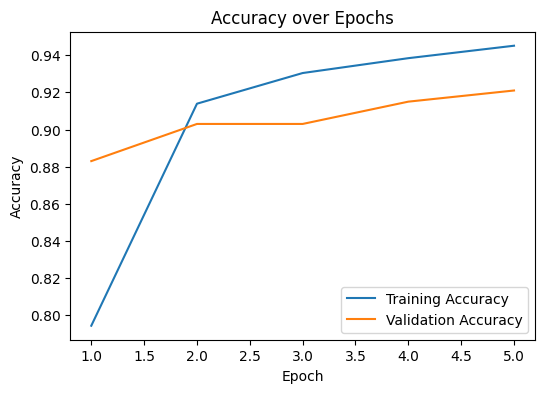

In [10]:
import matplotlib.pyplot as plt

# Extract accuracy history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs_range = range(1, len(acc)+1)

# Plot accuracy curves
plt.figure(figsize=(6,4))
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

After running this, you should see a line plot. Ideally, both training and validation accuracy improve and then level off. If they stay close together, it means the model generalizes well on this task. If there's a big gap (training much higher than validation), it suggests overfitting.

Note: With our small network and limited data, overfitting shouldn't be severe, but if you increased the network size or training epochs, you might start to see it.

### Evaluate the Model and Make Predictions

Finally, let's see how our trained model performs on the test set in terms of overall accuracy, and then inspect some individual predictions.

First, we can get the overall accuracy on the test set using `model.evaluate`:

In [11]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_accuracy:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9388 - loss: 0.2473
Test accuracy: 0.9210


This will print the test accuracy (and loss). It gives a summary of how well the model is doing on unseen data.

Next, let's make some predictions on individual samples and compare with the true labels. We'll:


*   Pick a few random test images.
*   Use `model.predict` on those images to get the probability distribution over classes.
*   Take the argmax of the prediction to get the predicted digit.
*   Display the images with both the True label and Predicted label.



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


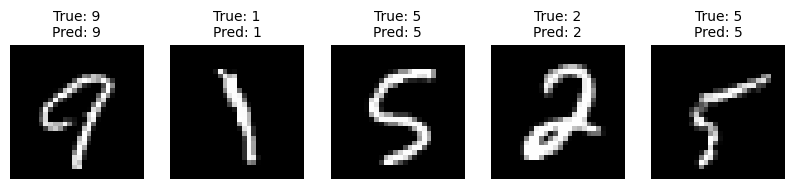

In [12]:
import numpy as np

# Get model predictions for the test set
pred_probs = model.predict(x_test)              # predicted probabilities for each class (shape: [num_test, 10])
pred_labels = np.argmax(pred_probs, axis=1)     # convert probabilities to class with highest probability

# Select a few random test samples to visualize
num_samples_to_show = 5
indices = np.random.choice(len(x_test), num_samples_to_show, replace=False)

plt.figure(figsize=(10, 2))
for i, idx in enumerate(indices):
    img = x_test[idx].reshape(28, 28)  # reshape back to 28x28 image for display
    true_label = y_test[idx]
    predicted_label = pred_labels[idx]

    # Plot the image
    plt.subplot(1, num_samples_to_show, i+1)
    plt.imshow(img, cmap='gray')
    plt.axis('off')  # no axis for cleaner look

    # Title with True and Predicted labels
    plt.title(f"True: {true_label}\nPred: {predicted_label}", fontdict={'fontsize': 10})
plt.show()

After running the above:


*   You should see 5 random digit images from the test set.
*   Each image title shows "True: X, Pred: Y" where X is the actual label and Y is what our model predicted.
*   Ideally most (or all) of these predictions are correct if our model learned well. If some are wrong, that's a good point to analyze: maybe the digit was ambiguous or our model made a mistake.

## Summary

We've built and trained our first multi-layer perceptron on a real dataset! Here's a summary of what we did:


*   Defined a simple neural network with one hidden layer.
*   Trained it on a subset of MNIST data to classify digits.
*   Monitored training through accuracy curves.
*   Tested the model and visualized predictions.
